# Decision Trees

**Decision Trees** are versatile Machine Learning techniques that allow for both classification and regression.

In [3]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Training and Visualizing a Decision Tree

To better explain **Decision Trees**, let's analyze the code below applied to the _iris flower_ dataset:

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [7]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str(IMAGES_PATH / "iris_tree.dot"),  # path differs in the book
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

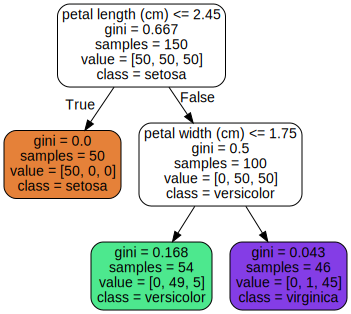

In [8]:
from graphviz import Source

Source.from_file(IMAGES_PATH / "iris_tree.dot")

## Making Predictions

**Decision Trees** have the following components:

- _Root Node_: Initial part where the first values ​​to be differentiated are defined. Depth 0, located at the top. Asks if the length of the flower is less than or equal to 2.45cm.

- _Path_: The path that moves indicates whether what was promised in the previous node is True or False. If it went to the Left path, it corresponds to True, that is, in our case, the size was equal to or less than 2.45cm. If it went to the Right path, it indicates that it is False, that is, it is not equal to or less than 2.45cm.

- _Leaf Node_: Node that has no more branches, no more child nodes, therefore, it does not ask any more questions;

- _Split Node_: Node that culminates in more branches (depth n).

$$
G_{i} = 1 - \sum_{k=1}^{n} p_{i,k}^{2}
$$

## Estimating Class Probabilities

## The CART Training Algorithm

## Computational Complexity

## Gini Impurity or Entropy?

## Regularization Hyperparameters

## Regression